# Data Exploration

In [31]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import joblib

import params as p

## Settings

In [32]:
pd.set_option('max_rows', 1000)
pd.set_option('max_columns', 1000)

colour_palette = sns.color_palette("hls", 9)

## Load Data

In [33]:
data = joblib.load(p.DATA_PATH + f'00_{p.DATA_SAVE_NAME}.pkl')

In [34]:
data.head()

,date,rented_bike_count,hour,temperature,humidity,wind_speed,visibility,dew_point_temperature,solar_radiation,rainfall,snowfall,seasons,holiday,functioning_day
0,2017-01-12,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,2017-01-12,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,2017-01-12,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,2017-01-12,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,2017-01-12,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes


In [35]:
data.shape

(8760, 14)

In [36]:
data.columns

Index(['date', 'rented_bike_count', 'hour', 'temperature', 'humidity',
       'wind_speed', 'visibility', 'dew_point_temperature', 'solar_radiation',
       'rainfall', 'snowfall', 'seasons', 'holiday', 'functioning_day'],
      dtype='object')

## Initial Analysis

### Duplicated Rows

In [37]:
num_dup_rows = data.duplicated().sum()

print(f'Number of duplicated rows: {num_dup_rows}')

Number of duplicated rows: 0


### Unique Values

In [38]:
unique_values = data.nunique().to_frame(name = 'number of unique values')

unique_values['proportion of unique values over total rows'] = unique_values['number of unique values'] / data.shape[0]

unique_values

,number of unique values,proportion of unique values over total rows
date,365,0.041667
rented_bike_count,2166,0.247260
hour,24,0.002740
temperature,546,0.062329
humidity,90,0.010274
wind_speed,65,0.007420
visibility,1789,0.204224
dew_point_temperature,556,0.063470
solar_radiation,345,0.039384
rainfall,61,0.006963


### Datatypes

In [39]:
data.dtypes

date                     datetime64[ns]
rented_bike_count                 int64
hour                              int64
temperature                     float64
humidity                          int64
wind_speed                      float64
visibility                        int64
dew_point_temperature           float64
solar_radiation                 float64
rainfall                        float64
snowfall                        float64
seasons                          object
holiday                          object
functioning_day                  object
dtype: object

## Response Analysis

### Define response

In [40]:
RESPONSE = 'rented_bike_count'

In [44]:
round(data[[RESPONSE]].describe(), 2)

,rented_bike_count
count,8760.00
mean,704.60
std,645.00
min,0.00
25%,191.00
50%,504.50
75%,1065.25
max,3556.00


### Response Distribution

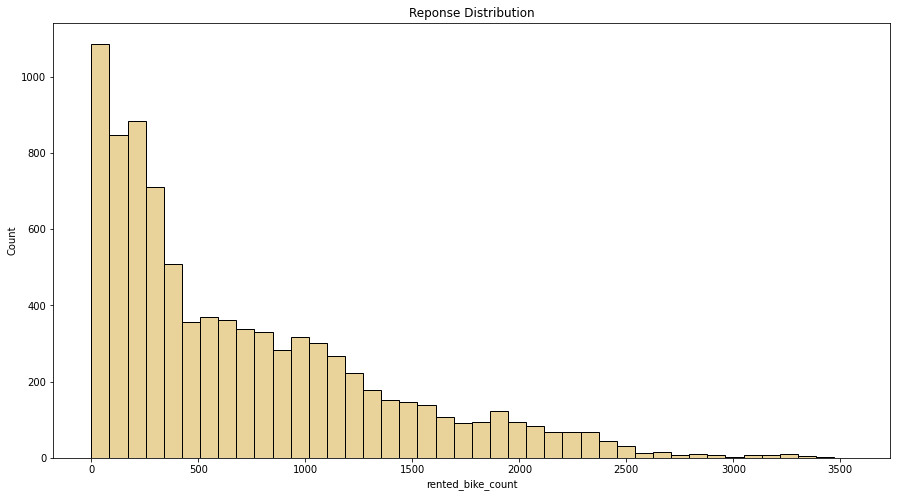

In [11]:
fig, ax = plt.subplots(nrows = 1, ncols=1, figsize = (15,8))

ax = sns.histplot(data=data, x = RESPONSE, alpha = 0.6, color=colour_palette[1])
ax.set_title('Reponse Distribution')
plt.show()

Conclusion: there is a positive skew in the response

### Response over time

In [12]:
print(f'Min Date: {data.date.min().strftime("%d/%m/%Y")}')
print(f'Max Date: {data.date.max().strftime("%d/%m/%Y")}')

Min Date: 12/01/2017
Max Date: 11/12/2018


### Extract Information from Date

In [13]:
data['als_month'] = data.date.dt.to_period('M')

In [14]:
data.head()

,date,rented_bike_count,hour,temperature,humidity,wind_speed,visibility,dew_point_temperature,solar_radiation,rainfall,snowfall,seasons,holiday,functioning_day,als_month
0,2017-01-12,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,2017-01
1,2017-01-12,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,2017-01
2,2017-01-12,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes,2017-01
3,2017-01-12,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,2017-01
4,2017-01-12,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes,2017-01


### Monthly View

In [15]:
mean_month_response = data[[RESPONSE, 'als_month']].groupby('als_month', as_index = False).mean()

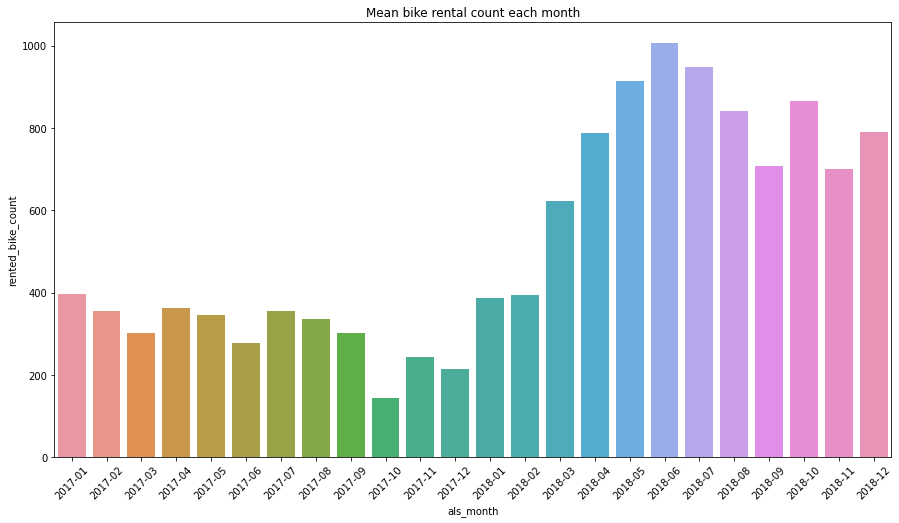

In [16]:
fig1, ax1 = plt.subplots(nrows=1, ncols=1, figsize = (15, 8))

ax1 = sns.barplot(data=mean_month_response, x = 'als_month', y = RESPONSE)
ax1.set_title('Mean bike rental count each month')
plt.xticks(rotation = 45)
plt.show()

As we can see there seems to be a split in the data between 2017 and 2018 - is there anything more going on here?

### Monthly value counts

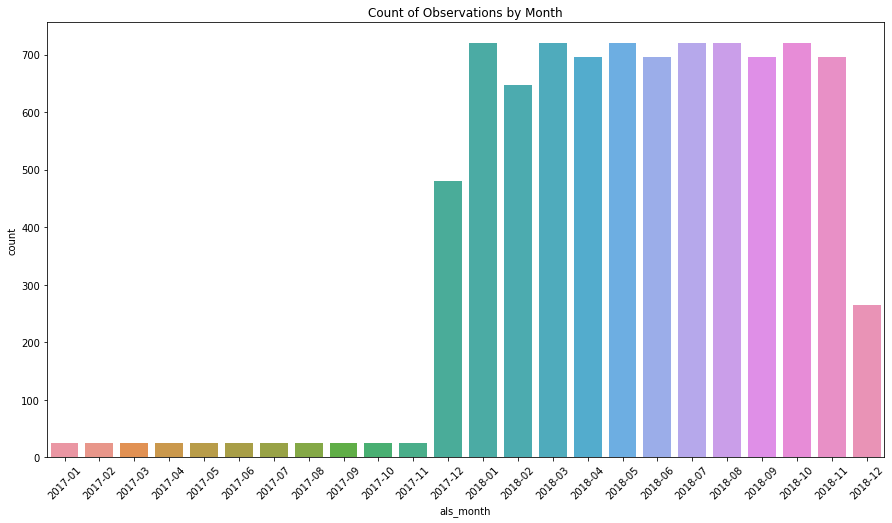

In [17]:
fig1_1, ax1_1 = plt.subplots(nrows=1, ncols=1, figsize = (15, 8))

sns.countplot(data=data, x='als_month')
ax1_1.set_title('Count of Observations by Month')
plt.xticks(rotation = 45)
plt.show()

We see here that there is a lot more data entries from December 2017 onwards. Coupled with the bar chart showing mean `rented_bike_count` per month, we can also see that this split is matched with an average value split i.e. there are more entries and there are a greater number of hires for each entry on average.

Conclusion: We will filter on date on 01/12/2017 so we only include data from this point onwards since data pre-01/12/2017 is not representative of the current state due to the above reasons.

In [18]:
del data['als_month']

### Splitting the data into the two years

Not sure this is needed anymore.

In [19]:
# KEYDATE = datetime(day = 1, month = 12, year = 2017)

# data_012117 = data[data.date < KEYDATE]
# data_onwards = data[data.date >= KEYDATE]

In [20]:
# data.shape, data_012117.shape, data_onwards.shape

Due to the imbalance in both data count and average value, pre-01/12/2017 is unrepresentative of the current state of the feature and so we should exclude them. Further, since this only accounts for 264 data points, this shouldn't have a significant effect on our datasize.

We will now use `data_onwards` for further analysis.

## Feature Analysis

### Define features

In [21]:
date_features = ['date']

target_feature = ['rented_bike_count']

numeric_features = ['hour', 'temperature', 'humidity', 'wind_speed', 'visibility', 'dew_point_temperature', 'solar_radiation', 'rainfall', 'snowfall']

object_features = ['seasons', 'holiday', 'functioning_day']

In [22]:
all_fields = date_features + target_feature + numeric_features + object_features

if len(all_fields) == data.shape[1]:
    print('All features accounted for.')

All features accounted for.


### Numeric Features

In [23]:
num_summary = data[numeric_features].describe().T
num_summary['Null'] = data[numeric_features].isnull().sum()
num_summary['Unique'] =data[numeric_features].nunique()
num_summary

,count,mean,std,min,25%,50%,75%,max,Null,Unique
hour,8760.0,11.500000,6.922582,0.0,5.75,11.50,17.25,23.00,0,24
temperature,8760.0,12.882922,11.944825,-17.8,3.50,13.70,22.50,39.40,0,546
humidity,8760.0,58.226256,20.362413,0.0,42.00,57.00,74.00,98.00,0,90
wind_speed,8760.0,1.724909,1.036300,0.0,0.90,1.50,2.30,7.40,0,65
visibility,8760.0,1436.825799,608.298712,27.0,940.00,1698.00,2000.00,2000.00,0,1789
dew_point_temperature,8760.0,4.073813,13.060369,-30.6,-4.70,5.10,14.80,27.20,0,556
solar_radiation,8760.0,0.569111,0.868746,0.0,0.00,0.01,0.93,3.52,0,345
rainfall,8760.0,0.148687,1.128193,0.0,0.00,0.00,0.00,35.00,0,61
snowfall,8760.0,0.075068,0.436746,0.0,0.00,0.00,0.00,8.80,0,51


#### Distributions

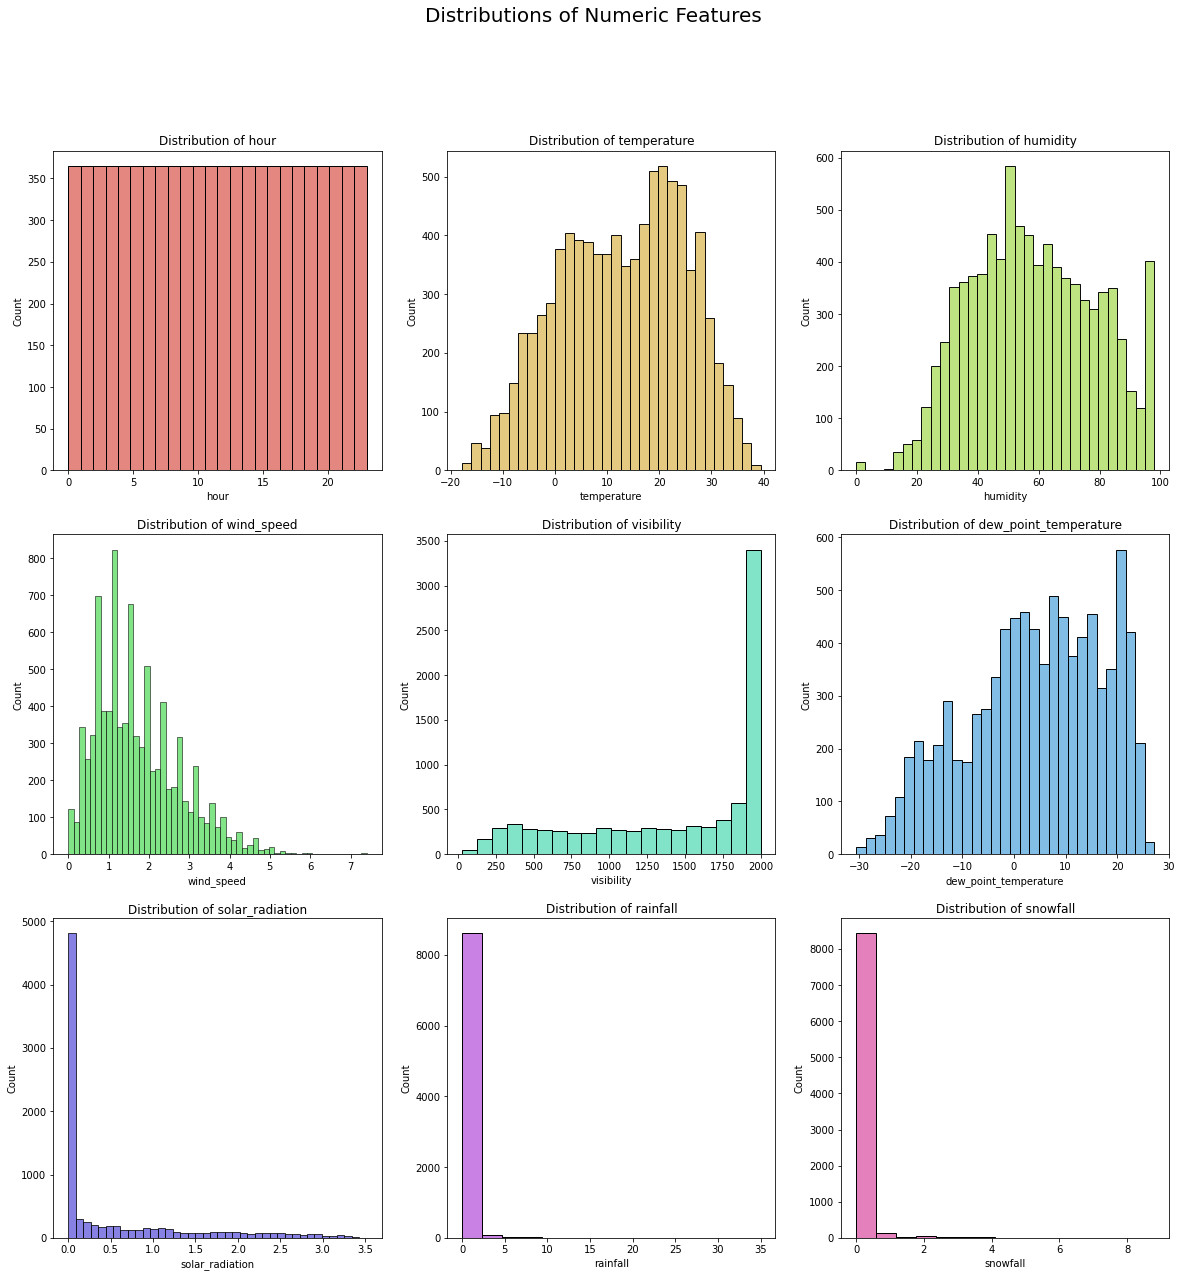

In [24]:
fig3, ax3 = plt.subplots(nrows = 3, ncols = 3, figsize = (20, 20))

for idx, col in enumerate(numeric_features):
    x, y = idx // 3, idx % 3
    if col == 'hour':

        sns.histplot(
            ax = ax3[x, y],
            data=data,
            x = col, color= colour_palette[idx],
            bins = 24
            ).set(title = f'Distribution of {col}')

    else:

        sns.histplot(
            ax = ax3[x, y],
            data=data,
            x = col, color= colour_palette[idx]
            ).set(title = f'Distribution of {col}')

fig3.suptitle('Distributions of Numeric Features', fontsize = 20)
plt.show()

High skew in `solar_radiation`, `rainfall`, `snowfall` and `visibility` - this shouldn't affect our results.

#### Correlation

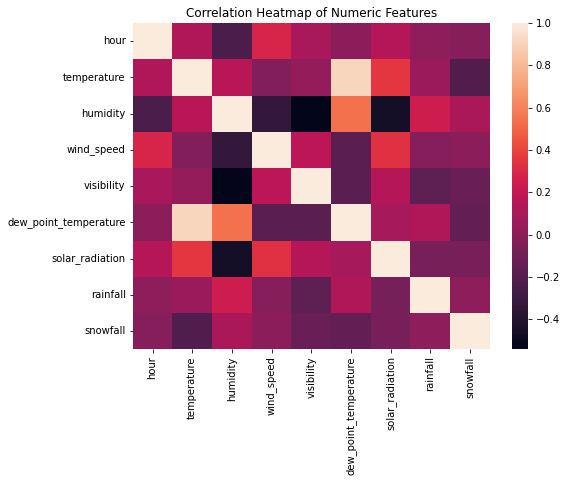

In [25]:
correlation = data[numeric_features].corr()

fig4, ax4 = plt.subplots(figsize = (8, 6))

sns.heatmap(
    ax=ax4,
    data = correlation,
    xticklabels = correlation.columns,
    yticklabels = correlation.columns
).set(title = 'Correlation Heatmap of Numeric Features')

plt.show()

High correlation (~0.91) between `temperature` and `dew_point_temperature`. Due to this correlation, and since there is also a light correlation with `humidity`, we will remove `dew_point_temperature` for modelling.

### Object Features

In [26]:
obj_summary = data[object_features].describe().T
obj_summary['Null'] = data[object_features].isnull().sum()
obj_summary

,count,unique,top,freq,Null
seasons,8760,4,Spring,2208,0
holiday,8760,2,No Holiday,8328,0
functioning_day,8760,2,Yes,8465,0


No missing values, few unique values.

#### Distributions

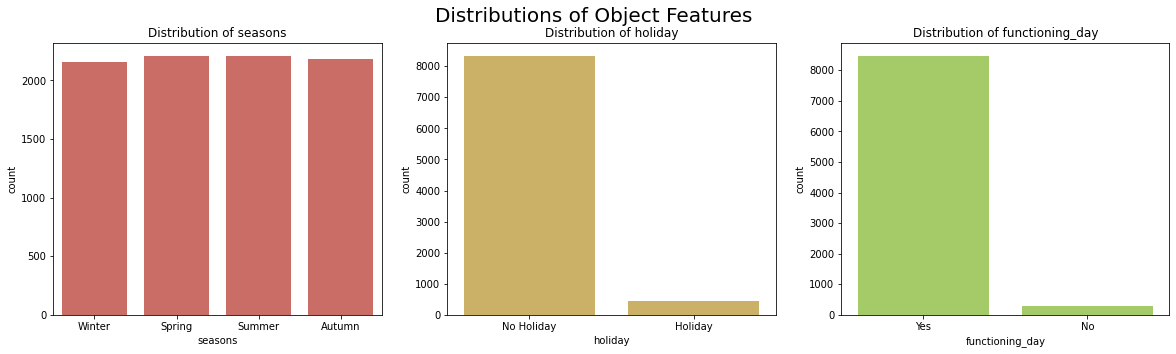

In [27]:
fig5, ax5 = plt.subplots(nrows=1, ncols=3, figsize = (20, 5))

for idx, col in enumerate(object_features):
    
    sns.countplot(
        ax = ax5[idx],
        data = data,
        x = col,
        color=colour_palette[idx]
        ).set(title = f'Distribution of {col}')

fig5.suptitle('Distributions of Object Features', fontsize = 20)
plt.show()

There is quite a severe imbalance between the `holiday` and `functioning_day` features. However, this shouldn't be an issue, but something to keep an eye on to avoid overfitting.

`seasons` feature looks good, but will need dummy features created in feature engineering.

#### Influence that `holiday` and `functioning_day` has on `response`

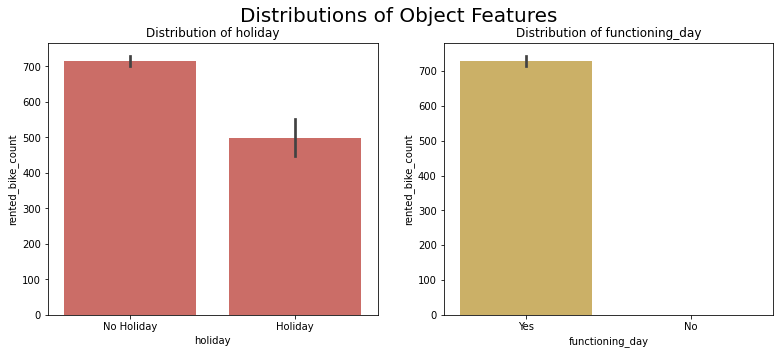

In [28]:
fig6, ax6 = plt.subplots(nrows=1, ncols=2, figsize = (13, 5))

for idx, col in enumerate(['holiday', 'functioning_day']):

    sns.barplot(
        ax = ax6[idx],
        data = data,
        x = col,
        y = RESPONSE,
        color=colour_palette[idx]
        ).set(title = f'Distribution of {col}')

fig6.suptitle('Distributions of Object Features', fontsize = 20)
plt.show()

`holiday` does seem to be influencial so something we should keep, but we will make it binary. However, `functioning_day` is clearly a feature to remove since it's just an indicator of a definite zero. Conclusion is to filter on `functioning_day` == 1 and drop.

In [29]:
data.head()

,date,rented_bike_count,hour,temperature,humidity,wind_speed,visibility,dew_point_temperature,solar_radiation,rainfall,snowfall,seasons,holiday,functioning_day
0,2017-01-12,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,2017-01-12,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,2017-01-12,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,2017-01-12,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,2017-01-12,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes
